<br><br>
<font size = "6">
<b>Unsupervised Learning: Dimension Reduction</b>
</font>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Principal Component Analysis (PCA)
<br>
<font size='4'><b>Motivation: Can we describe high-dimensional data in a "simpler" way?</b></font> <br><br>
$\quad \rightarrow$ Dimension reduction without losing too much information <br>
$\quad \rightarrow$ Find a low-dimensional, yet useful representation of the data

- Why dimensionality reduction?
    - insights into the low-dimensinal structures in the data (visualization)
    - Fewer dimensions ⇒ Less chances of overfitting ⇒ Better generalization
    - <font color='blue'>Speeding up</font> learning algorithms
        - Most algorithms scale badly with increasing data dimensionality
    - <font color='blue'>Less storage</font> requirements (data compression)
    - Note: Dimensionality Reduction is <font color='red'>different from Feature Selection</font>
        - .. although the goals are kind of the same
    - Dimensionality reduction is more like “<font color='red'>Feature Extraction</font>”
        - Constructing a small set of new features from the original features

- How? <br>
idea: highly correlated data contains redundant features

<br>
<center><img src="./image_files/pca_redundancy.png" width = 600></center>
<br><br>

- Each example $x$ has 2 features $\{x_1,x_2\}$

- Consider ignoring the feature $x_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$

- Are we losing much information by throwing away $x_2$ ?

<br><br>
<center><img src="./image_files/data_indep.png" width = 250></center>

- Each example $x$ has 2 features $\{x_1,x_2\}$

- Consider ignoring the feature $x_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{x_1\}$

- Are we losing much information by throwing away $x_2$ ?

- <font color='blue'>Yes</font>, the data has substantial variance along both features (_i.e._ both axes)

<br><br>
<center><img src="./image_files/data_dep.png" width = 200></center>


- Now consider a change of axes

- Each example $x$ has 2 features $\{u_1,u_2\}$

- Consider ignoring the feature $u_2$ for each example

- Each 2-dimensional example $x$ now becomes 1-dimensional $x = \{u_1\}$

- Are we losing much information by throwing away $u_2$ ?

- <font color='red'>No</font>. Most of the data spread is along $u_1$ (very little variance along $u_2$)            

<br><br>
<center><img src="./image_files/data_u.png" width = 200></center>

- Data $\rightarrow$ projection onto unit vector $\hat{u}_1$
- PCA is used when we want projections capturing maximum variance directions
- Principal Components (PC): directions of maximum variability in the data
- Roughly speaking, PCA does a change of axes that can represent the data in a succinct manner

<br><br>
<center><img src="./image_files/pca_major_01.png" width = 250></center>

<center><img src="./image_files/pca_animation.gif" width = 800></center>


- HOW?
 1. <font color='blue'>Maximize variance</font> (most separable)
 2. <font color='blue'>Minimize the sum-of-squares</font> (minimum squared error)

# 2. PCA Algorithm

## 2.1. Pre-processing

- Given data 

$$ x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ \vdots \\x^{(i)}_n \end{bmatrix},\qquad X = \begin{bmatrix} \cdots & (x^{(1)})^T & \cdots\\
\cdots & (x^{(2)})^T & \cdots\\
& \vdots & \\
\cdots & (x^{(m)})^T & \cdots\\
\end{bmatrix}$$


- Shifting (zero mean) and rescaling (unit variance) 
    1. Shift to zero mean
$$ 
\begin{align*}
\mu &= \frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)} \\
x^{(i)} &\leftarrow x^{(i)} - \mu \quad \text{(zero mean)}
\end{align*}
$$
<br>
    2. [optional] Rescaling (unit variance)
$$\begin{align*}
\sigma^2_j &= \frac{1}{m-1}\sum\limits_{i=1}{m}\left(x_j^{(i)}\right)^2 \\
x^{(i)}_j &\leftarrow \frac{x^{(i)}_j}{\sigma_j} \\
\end{align*}$$


## 2.2. Maximize Variance

- Find unit vector $u$ such that <font color='red'>maximizes variance of projections</font>

 Note: $m \approx m-1$ for big data

$$\begin{align*} \text{variance of projected data}
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big(u^Tx^{(i)}\big)^2  = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^2 \\
& = \frac{1}{m}\sum\limits_{i=1}^{m}\big( {x^{(i)}}^Tu\big)^T\big( {x^{(i)}}^Tu\big) = \frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T \right) u \\
& =u^TSu \qquad (S=\frac{1}{m}X^T X: \text{sample covariance matrix})
\end{align*}$$

- In an optimization form

$$\begin{align*} \text{maximize} \quad & u^TSu \\
\text{subject to} \quad
& u^Tu = 1\end{align*}$$

<br>

$$\begin{align*} & u^TSu = u^T\lambda u = \lambda u^Tu = \lambda \quad (\text{Eigen analysis} : Su = \lambda u) \\ \\
& \implies \text{pick the largest eigenvalue } \lambda _1 \text{ of covariance matrix } S\\
& \implies u = u_1 \, \text{ is the } \,\lambda_1's \,\text{ corresponding eigenvector}\\
& \implies u_1 \text{ is the first principal component (direction of highest variance in the data)}
\end{align*}$$

## 2.3. Minimize the Sum-of-Squared Error

<br><br>
<center><img src="./image_files/sumofsquare.png" width = 350></center>
<br><br>

$$
\begin{align*} \lVert e^{(i)} \rVert ^2 & = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^2 \\
& = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^T\big( {x^{(i)}}^Tu \big) \\
& = \lVert x^{(i)} \rVert ^2 - u^Tx^{(i)}{x^{(i)}}^Tu\\
\end{align*}
$$
  
<br><br>

$$\begin{align*} \frac {1}{m} \sum\limits_{i=1}^{m} \lVert e^{(i)} \rVert ^2
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2 - 
\frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu \\
& = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2  - 
u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u \end{align*}$$

- In an optimization form

<br>
$$\begin{align*} &\text{minimize} \; \underbrace{\frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2}_{\text{constant given $x_i$}}  - 
 \underbrace{u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u}_{\text{maximize}} \\ \\
\implies &\text{maximize} \;
 u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u = \max \; u^T S u\end{align*}$$

<br>

$$ \therefore \; \text{minimize} \; error^2 = \text{maximize} \; variance$$

## 2.4. Dimension Reduction Method ($n \rightarrow k$)

1. Choose top $k$ (orthonormal) eigenvectors, $U = [u_1, u_2, \cdots, u_k]$
    
2. Project $x_i$ onto span $\{ u_1, u_2, \cdots, u_k\}$
    
<br>
$$z^{(i)} = \begin{bmatrix} 
u_1^Tx^{(i)}\\
u_2^Tx^{(i)}\\
\vdots \\
u_k^Tx^{(i)}\\
\end{bmatrix} \;\text{ or }\; z = U^{T}x
$$

- Pictorial summary of PCA

<br>
<center><img src="./image_files/pca_summary.png" width = 800></center>
<br>

$\qquad \qquad \qquad x^{(i)} \rightarrow$ projection onto unit vector $u \implies u^Tx^{(i)} = $ distance from the origin along $u$

# 3. PCA Visualization

## 3.1. Eigenvalues

- $\lambda_1, \lambda_2$ indicates variance along the eigenvectors, respectively.

- The larger eigenvalue is, the more dominant feature (eigenvector) is  


<img src="./image_files/eigenvalue.png" width = 500>

## 3.2. Eigenvectors

- Given basis $\{\hat{x}_1, \hat{x}_2\}$ to transformed basis $\{\hat{u}_1, \hat{u}_2\}$

<br>
<img src="./image_files/eigenvector.png" width = 350>
<br>

$$[\hat{u}_1\; \hat{u}_2]=[\hat{x}_1 \; \hat{x}_2]\begin{bmatrix} c_1 & c_3 \\c_2 & c_4\end{bmatrix}$$

# 4. Python Codes

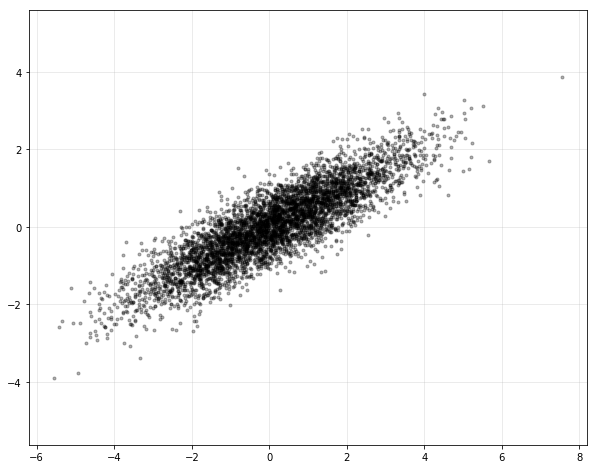

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
"""Create 2d gaussian-distributed 5000 data points with 
mean [0, 0], sample variance [3, 1], and sample covariance [1.5, 1.5] (Hint: numpy의 multivariate_normal)

m = 
mu = 
cov = [[Sxx, Sxy]
      ,[Syx, Syy]]
X = 

"""
m = 5000
mu = np.array([0, 0])
cov = np.array([[3, 1.5],
                [1.5, 1]])

X = np.random.multivariate_normal(mu, cov, m)

X = np.asmatrix(X)
#print(X.shape)

fig = plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

In [82]:
""" Implement PCA without using Scikit tool (Hint: np.linalg.eig)
S = 

D, U = 

"""
S = 1/(m-1)*(X.T*X)
# S = sample covariance matrix

D, U = np.linalg.eig(S)

idx = np.argsort(-D) 
# D의 크기 순서가 바뀔 수 있어서 큰거 부터 나오도록 안전장치
D = D[idx]
U = U[:,idx]

# D : eigen value
# U : eigen vector

print(D, '\n')
print(U)

[3.84545858 0.19155065] 

[[ 0.88259101 -0.47014159]
 [ 0.47014159  0.88259101]]


In [83]:
'''
S * u = lambda * u
S = [[1, 2
     [1, 2]]]

[1, 2][x1]   lambda[x1]
[1, 2][x2] =        [x2]

x1 + 2x1 = lambda* x1
x1 + 2x2 = lambda* x2

(lambda**2 - temp)*x1 = 0
'''

'\nS * u = lambda * u\nS = [[1, 2\n     [1, 2]]]\n\n[1, 2][x1]   lambda[x1]\n[1, 2][x2] =        [x2]\n\nx1 + 2x1 = lambda* x1\nx1 + 2x2 = lambda* x2\n\n(lambda**2 - temp)*x1 = 0\n'

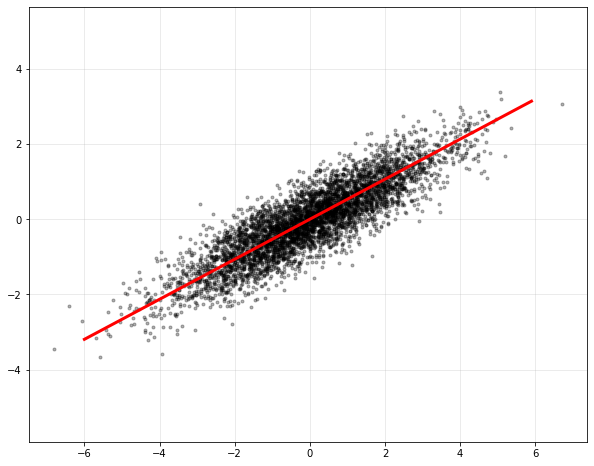

In [84]:
""" Plot the first principal component
h = 선을 나타내는 coeffcient, 하나의 직선
xp = 
yp = 


"""
h = U[1,0]/U[0,0]
xp = np.arange(-6, 6, 0.1)
yp = h*xp

fig = plt.figure(figsize=(10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha=0.3)
plt.plot(xp, yp, 'r', linewidth=3)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

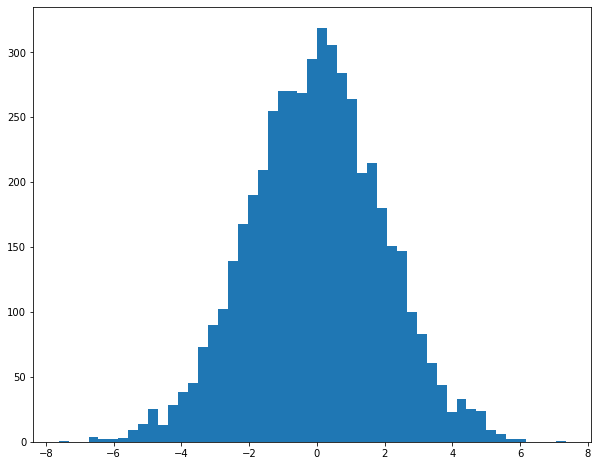

In [85]:
"""Choose the first principal component and and plot histogram of projected X samples 

Z = U.T * X

"""
Z = X*U[:,0]
# first eigen vactor , first principal component

plt.figure(figsize = (10, 8))
plt.hist(Z, 51)
plt.show()

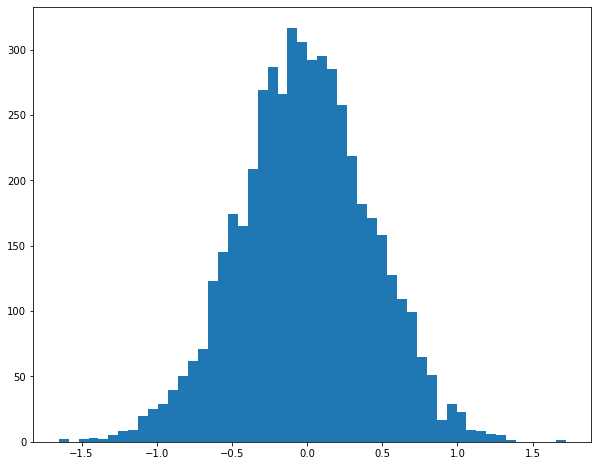

In [86]:
"""Choose the second principal component and and plot histogram of projected X samples 

Z = 

"""
Z = X*U[:,1] 
# second eigen vactor , second principal component

plt.figure(figsize = (10, 8))
plt.hist(Z, 51)
plt.show()

In [88]:
"""
1. Implement PCA using Scikit-learn (sklearn.decomposition.PCA)
2. Find the first principal component
3. Find eigenvalue
4. Plot the first principal component with data points

pca = 

"""

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

In [89]:
pca.components_ # eigen vector

array([[-0.88265259, -0.47002596]])

In [90]:
pca.explained_variance_ # eigen value

array([3.84438161])

In [92]:
pca.explained_variance_ratio_ 
#해당 vector로 설명할 수 있는 정보의 양 / 95% / 손실이 별로 없었다.

array([0.95258889])

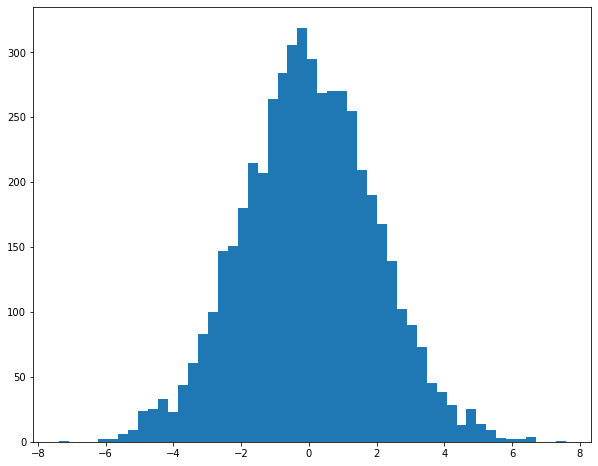

In [93]:
Z = pca.transform(X)

plt.figure(figsize = (10, 8))
plt.hist(Z, 51)
plt.show()

# 5. PCA Example
- Multiple video camera records of a spring and mass system

<br><br>
<center><img src="./image_files/senses.png" width = 400></center>
<br>

- source:
    - https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf

In [5]:
%%html
<center><iframe 
width="560" height="315" src="https://www.youtube.com/embed/Pkit-64g0eU" frameborder="0" allowfullscreen>
</iframe></center>

In [6]:
%%html
<center><iframe 
width="560" height="315" src="https://www.youtube.com/embed/x4lvjVjUUqg" frameborder="0" allowfullscreen>
</iframe></center>

In [7]:
%%html
<center><iframe 
width="560" height="315" src="https://www.youtube.com/embed/2t62WkNIqxY" frameborder="0" allowfullscreen>
</iframe></center>

$$ x^{(i)} = 
\begin{bmatrix} 
x \text{ in camera 1} \\ 
y \text{ in camera 1} \\
x \text{ in camera 2} \\
y \text{ in camera 2} \\
x \text{ in camera 3} \\
y \text{ in camera 3} 
\end{bmatrix},\qquad 
X_{m \times 6} = 
\begin{bmatrix} 
\cdots & (x^{(1)})^T & \cdots \\
\cdots & (x^{(2)})^T & \cdots \\
& \vdots & \\
& \vdots & \\
\cdots & (x^{(m)})^T & \cdots \\
\end{bmatrix}
$$

Download [files](https://www.dropbox.com/s/9skaad3vei8be2l/pca_spring.pkl?dl=1)

In [94]:
from six.moves import cPickle

X = cPickle.load(open('./data_files/pca_spring.pkl','rb'))
X = np.asmatrix(X.T)

print(X.shape)
m = X.shape[0]

(273, 6)


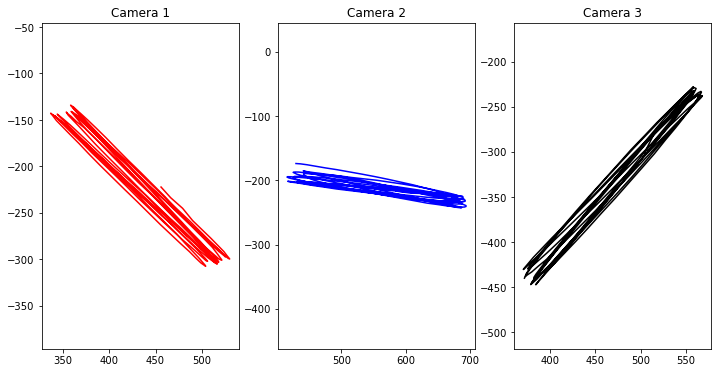

In [98]:
plt.figure(figsize = (12, 6))
plt.subplot(1,3,1)
plt.plot(X[:, 0], -X[:, 1], 'r')
plt.axis('equal')
plt.title('Camera 1')

plt.subplot(1,3,2)
plt.plot(X[:, 2], -X[:, 3], 'b')
plt.axis('equal')
plt.title('Camera 2')

plt.subplot(1,3,3)
plt.plot(X[:, 4], -X[:, 5], 'k')
plt.axis('equal')
plt.title('Camera 3')

plt.show()

In [100]:
"""
1. Shift to zero mean
2. Implement PCA without using Scikit tool

X = 

S = 

D, U = 

"""

X = X - np.mean(X, axis=0)
S = 1/(m-1)*X.T*X
D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D, '\n')
print(U)

[2.46033089e+04 3.22747042e+02 8.73851124e+01 8.19527660e+01
 3.19467195e+01 7.42861585e+00] 

[[ 0.36881064  0.62298194 -0.12571821 -0.42647348  0.52121775 -0.0807439 ]
 [ 0.35632379  0.57286174  0.132303    0.59881765 -0.40143215  0.08734045]
 [ 0.58419477 -0.22610057 -0.20325551 -0.47751523 -0.58153918  0.00857804]
 [ 0.08652315 -0.02671281  0.75692234 -0.14177391 -0.06010869 -0.62861422]
 [ 0.4159798  -0.29900638  0.49374948  0.05637591  0.32442517  0.62075559]
 [-0.46389987  0.37746931  0.32963322 -0.45633202 -0.34660023  0.45308403]]


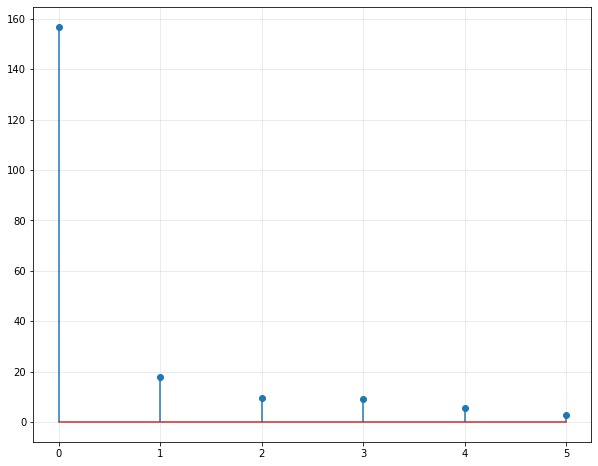

In [104]:
plt.figure(figsize = (10,8))
plt.stem(np.sqrt(D))
plt.grid(alpha = 0.3)
plt.show()

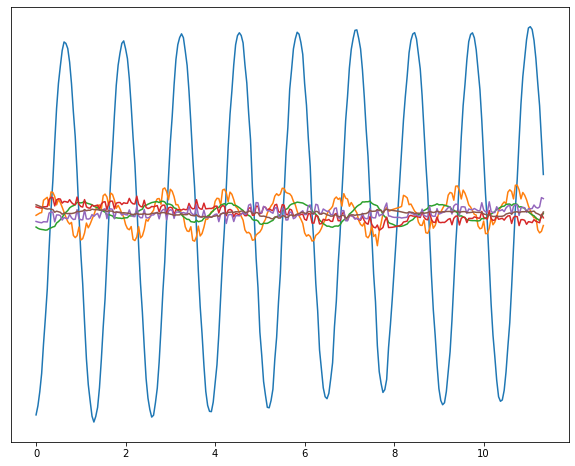

In [102]:
# relative magnitutes of the principal components

Z = X*U
xp = np.arange(0, m)/24    # 24 frame rate

plt.figure(figsize = (10, 8))
plt.plot(xp, Z)
plt.yticks([])
plt.show()

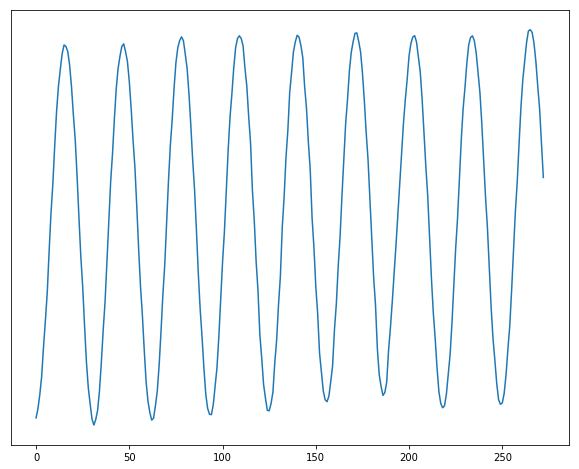

In [16]:
## projected onto the first principal component
# 6 dim -> 1 dim (dim reduction)
# relative magnitute of the first principal component

Z = X*U[:,0]

plt.figure(figsize = (10, 8))
plt.plot(Z)
plt.yticks([])
plt.show()

Reference: John P Cunningham & Byron M Yu, Dimensionality reduction for large-scale neural recordings, Nature Neuroscience 17, 1500–1509 (2014)

<br><br>
<center><img src="./image_files/pca_timeseries.png" width = 750></center>

In [17]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>